Import the libraries


In [ ]:
import tensorflow as tf # pip install tensorflow
import cv2 # pip install opencv-python
# pip install opencv-contrib-python  fullpackages
import os
import matplotlib.pyplot as plt # pip install matplotlibs
import numpy as np # pip install numpy


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
img_array = cv2.imread('/content/drive/MyDrive/train1/Closed_Eyes/s0001_00001_0_0_0_0_0_01.png',cv2.IMREAD_GRAYSCALE)

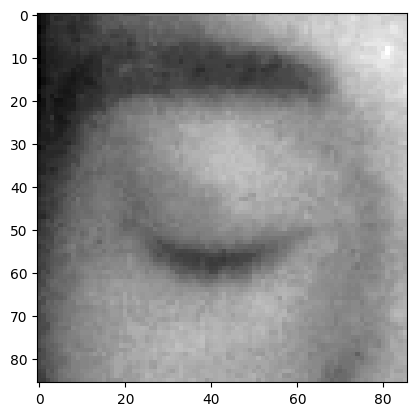

In [ ]:
plt.imshow(img_array, cmap = "gray")

In [ ]:
img_array.shape

(86, 86)

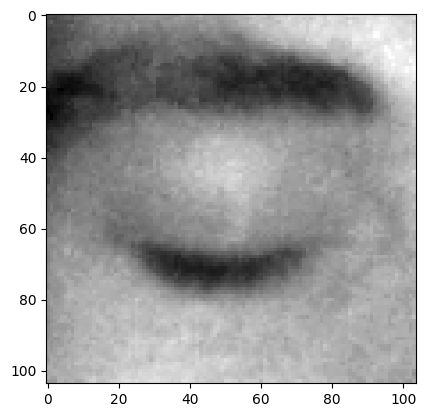

In [ ]:
drive_path = "/content/drive/MyDrive/train1"  # Update this with your actual drive path
Classes = ["Closed_Eyes", "Open_Eyes"]

for category in Classes:
    path = os.path.join(drive_path, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

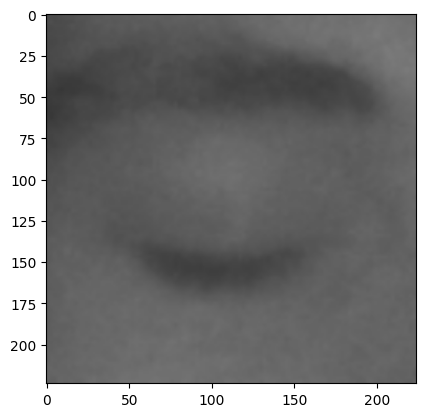

In [ ]:
img_size = 224

new_array = cv2.resize(backtorgb, (img_size, img_size))
plt.imshow(new_array, cmap = "gray")
plt.show()

# **Reading all the images and converting them into an array for data and labels**

In [ ]:
import os
import cv2

drive_path = "/content/drive/MyDrive/train1"  # Update this with your actual drive path
Classes = ["Closed_Eyes", "Open_Eyes"]
training_Data = []
img_size = 224  # Update this with your desired image size

def create_training_Data():
    for category in Classes:
        path = os.path.join(drive_path, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                new_array = cv2.resize(backtorgb, (img_size, img_size))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass

create_training_Data()

In [ ]:
print(len(training_Data))

2110


In [ ]:
import random

random.shuffle(training_Data)

In [ ]:
X = []
y = []

for features,label in training_Data:
  X.append(features)
  y.append(label)

X = np.array(X).reshape(-1, img_size, img_size, 3)

In [ ]:
X.shape

(2110, 224, 224, 3)

In [ ]:
# normalize the data
X = X/255.0; ## we are normalizing it

In [ ]:
Y = np.array(y)

In [ ]:
import pickle

pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [ ]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

### **Deep Learning model for training - Training Learning**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
model = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
model.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32

# **Transfer Learning**

In [ ]:
base_input = model.layers[0].input # input

In [ ]:
base_output = model.layers[-4].output

In [ ]:
Flat_layer = layers.Flatten()(base_output)
final_output = layers.Dense(1)(Flat_layer) # one node (1/0)
final_output = layers.Activation('sigmoid')(final_output)


In [ ]:
new_model = keras.Model(inputs = base_input, outputs=final_output)

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizati  (None, 112, 112, 32)      128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, 112, 112, 32)      288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, 112, 112, 32)      128 

# **Settings for binary classification (open / closed)**

In [ ]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [ ]:
new_model.fit(X,Y, epochs = 1, validation_split = 0.1) ## training.

60/60 [==============================] - 91s 1s/step - loss: 0.2868 - accuracy: 0.8931 - val_loss: 0.0840 - val_accuracy: 1.0000


In [ ]:
new_model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
# new_model = tf.keras.models.load_model('my_model_Drowsiness.h5')

# **Checking the network for predictions**

In [ ]:
import cv2

# Define the desired size for the image
img_size = 224  # or any other desired size

# Read the image in grayscale
img_array = cv2.imread('/content/depositphotos_2049780-stock-photo-blue-open-eye.jpg', cv2.IMREAD_GRAYSCALE)

# Convert grayscale image to RGB
backtorgb = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)

# Resize the image to the desired size
new_array = cv2.resize(backtorgb, (img_size, img_size))

# Check the shape of the resized image
print(new_array.shape)


(224, 224, 3)


In [ ]:
X_input = np.array(new_array).reshape(1, img_size, img_size, 3)

In [ ]:
X_input.shape

(1, 224, 224, 3)

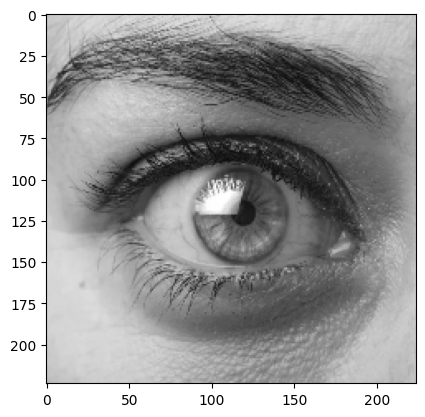

In [ ]:
plt.imshow(new_array)

In [ ]:
X_input= X_input/255.0

In [ ]:
prediction = new_model.predict(X_input)

1/1 [==============================] - 0s 444ms/step


In [ ]:
prediction

array([[0.92618513]], dtype=float32)

1/1 [==============================] - 0s 50ms/step


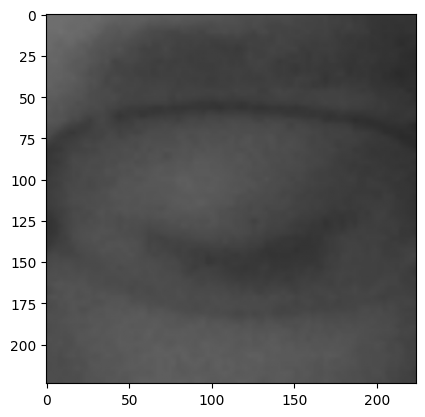

Drowsy
1/1 [==============================] - 0s 56ms/step


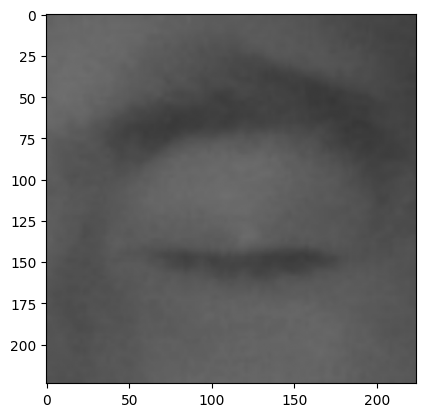

Drowsy
1/1 [==============================] - 0s 62ms/step


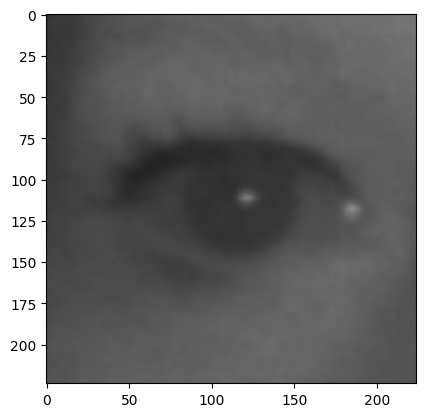

Not Drowsy
1/1 [==============================] - 0s 48ms/step


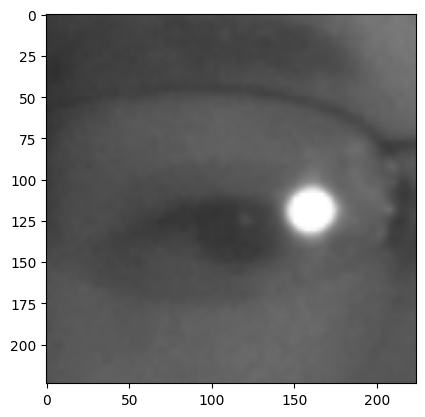

Not Drowsy
1/1 [==============================] - 0s 54ms/step


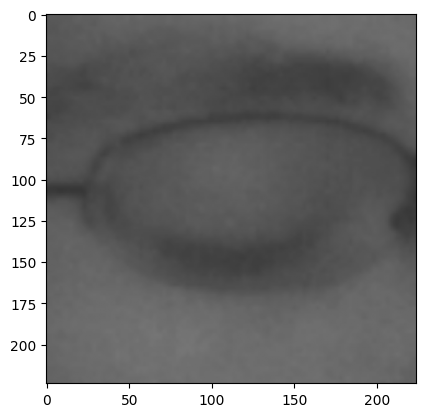

Drowsy
1/1 [==============================] - 0s 62ms/step


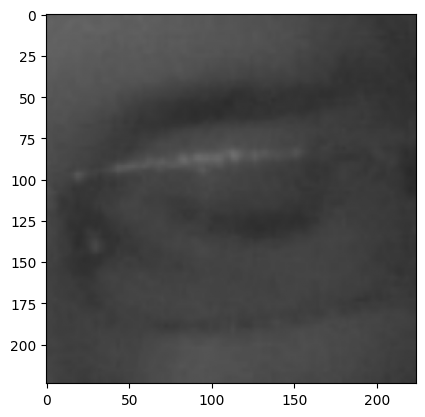

Drowsy
1/1 [==============================] - 0s 51ms/step


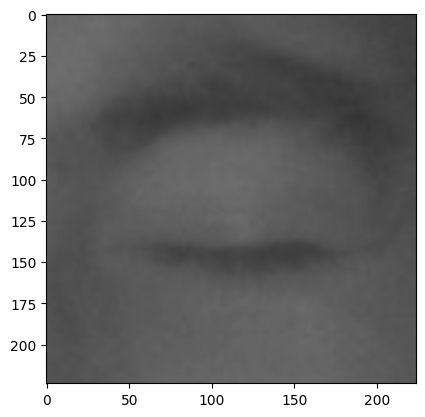

Drowsy
1/1 [==============================] - 0s 50ms/step


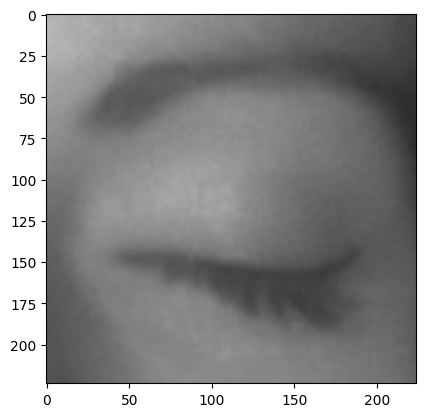

Drowsy
1/1 [==============================] - 0s 69ms/step


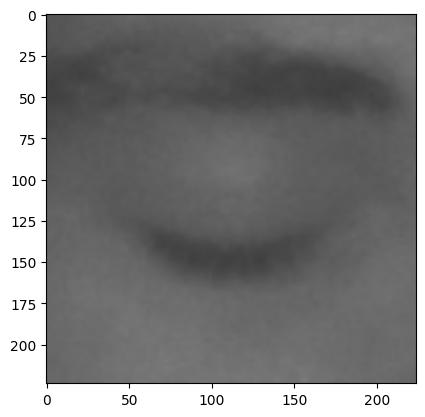

Drowsy


In [ ]:
for i in X[0:9]:
    result = new_model.predict(np.expand_dims(i,0))
    plt.imshow(i)
    plt.show()

    if result > 0.5:
        print('Not Drowsy')
    else:
        print("Drowsy")

In [ ]:
# Assume you have a function to load and preprocess your dataset
def load_dataset():
    # Load and preprocess your dataset here
    # Return the dataset X and its corresponding labels y
    return X, y


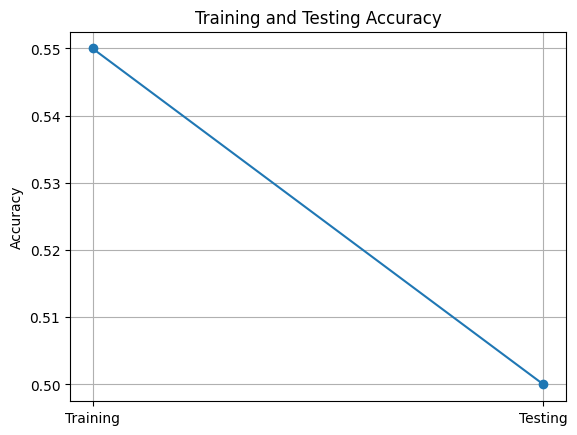

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume you have a function to load and preprocess your dataset
def load_dataset():
    # Load and preprocess your dataset here
    # Return the dataset X and its corresponding labels y
    # For demonstration purposes, we'll create dummy data
    X = np.random.rand(100, 10)  # Dummy feature matrix
    y = np.random.randint(0, 2, size=(100,))  # Dummy labels (binary classification)
    return X, y

# Assume you have a function to define and train your model
def train_model(X_train, y_train):
    # Define and train your model here
    # For demonstration purposes, we'll create a dummy model
    model = DummyModel()  # Replace DummyModel with your actual model
    model.fit(X_train, y_train)
    return model

# Assume you have a function to evaluate your model
def evaluate_model(model, X_test, y_test):
    # Evaluate your model and return the accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Dummy model for demonstration purposes
class DummyModel:
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.random.randint(0, 2, size=(X.shape[0],))

# Load and preprocess the dataset
X, y = load_dataset()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = train_model(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = evaluate_model(model, X_train, y_train)

# Evaluate the model on the testing set
test_accuracy = evaluate_model(model, X_test, y_test)

# Plot the training and testing accuracies
plt.plot([1, 2], [train_accuracy, test_accuracy], marker='o')
plt.xticks([1, 2], ['Training', 'Testing'])
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.grid(True)
plt.show()


In [ ]:
from tabulate import tabulate

# Load and preprocess the dataset
X, y = load_dataset()

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train your model
model = train_model(X_train, y_train)

# Evaluate the model on the training set
train_accuracy = evaluate_model(model, X_train, y_train)

# Evaluate the model on the testing set
test_accuracy = evaluate_model(model, X_test, y_test)

# Create a table to display the accuracies
table = [["Training Accuracy", train_accuracy],
         ["Testing Accuracy", test_accuracy]]

# Print the table
print(tabulate(table, headers=["Metric", "Accuracy"]))


Metric               Accuracy
-----------------  ----------
Training Accuracy        0.6
Testing Accuracy         0.35


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Assume you have a function to load and preprocess your dataset
def load_dataset():
    # Load and preprocess your dataset here
    # Return the dataset X and its corresponding labels y
    # For demonstration purposes, we'll create dummy data
    X = np.random.rand(100, 10)  # Dummy feature matrix
    y = np.random.randint(0, 2, size=(100,))  # Dummy labels (binary classification)
    return X, y

# Assume you have a function to define and train your model
def train_model(X_train, y_train):
    # Define and train your model here
    # For demonstration purposes, we'll create a dummy model
    model = DummyModel()  # Replace DummyModel with your actual model
    model.fit(X_train, y_train)
    return model

# Assume you have a function to evaluate your model
def evaluate_model(model, X_test, y_test):
    # Evaluate your model and return the accuracy
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

# Dummy model for demonstration purposes
class DummyModel:
    def fit(self, X, y):
        pass

    def predict(self, X):
        return np.random.randint(0, 2, size=(X.shape[0],))

# Load and preprocess the dataset
X, y = load_dataset()

# Initialize lists to store accuracies for each test
train_accuracies = []
test_accuracies = []

# Perform 10 tests
for i in range(10):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)

    # Train your model
    model = train_model(X_train, y_train)

    # Evaluate the model on the training set
    train_accuracy = evaluate_model(model, X_train, y_train)
    train_accuracies.append(train_accuracy)

    # Evaluate the model on the testing set
    test_accuracy = evaluate_model(model, X_test, y_test)
    test_accuracies.append(test_accuracy)

# Build a table to display the accuracies
print("Test\tTrain Accuracy\tTest Accuracy")
for i in range(10):
    print(f"{i+1}\t{train_accuracies[i]:.4f}\t\t{test_accuracies[i]:.4f}")


Test	Train Accuracy	Test Accuracy
1	0.5500		0.4500
2	0.5375		0.4500
3	0.5500		0.5000
4	0.4000		0.4000
5	0.4500		0.4500
6	0.4875		0.5500
7	0.4625		0.6000
8	0.4750		0.4000
9	0.5500		0.5000
10	0.5000		0.6500


# **Let's Check for unknown Image**

In [ ]:
img = cv2.imread('/content/70527682_medium.jpg')

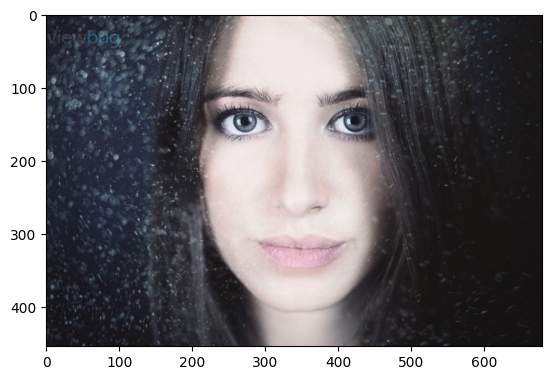

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [ ]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + '/content/haarcascade_frontalface_default.xml')

In [ ]:
# Load the Haar cascade classifier for detecting eyes
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [ ]:
eyes = eye_cascade.detectMultiScale(gray,1.1,4)

In [ ]:
for(x, y, w, h) in eyes:
  cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

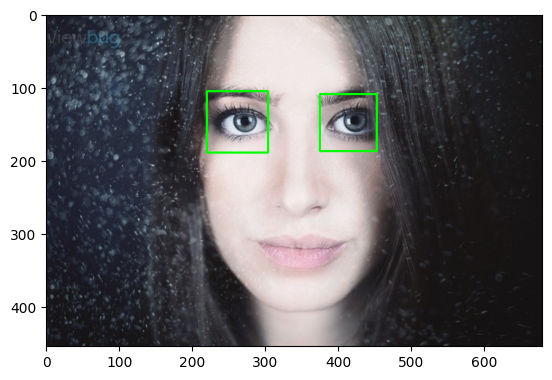

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# **Cropping the Eye Image**

In [ ]:
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# print (faceCascade.empty())
eyes = eye_cascade.detectMultiScale(gray, 1.1, 4)
for x, y, w, h in eyes:
  roi_gray = gray[y:y+h, x:x+w]
  roi_color = img[y:y+h, x:x+w]
  eyess = eye_cascade.detectMultiScale(roi_gray)
  if len(eyess) == 0:
    print("eyes are not detected")
  else:
    for(ex, ey, ew, eh) in eyess:
      eyes_roi = roi_color[ey: ey+eh, ex:ex + ew]

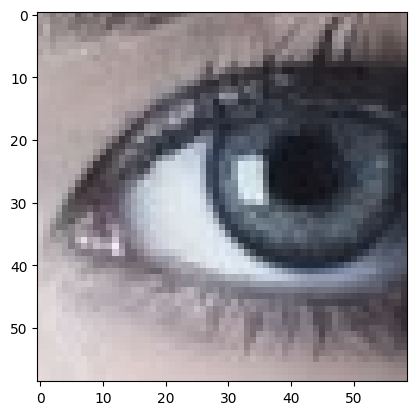

In [ ]:
plt.imshow(cv2.cvtColor(eyes_roi, cv2.COLOR_BGR2RGB))

In [ ]:
eyes_roi.shape

(59, 59, 3)

In [ ]:
final_image = cv2.resize(eyes_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0) # need fourth dimension
final_image = final_image/255.0

In [ ]:
final_image.shape

(1, 224, 224, 3)

In [ ]:
new_model.predict(final_image)

1/1 [==============================] - 0s 52ms/step


array([[0.9777978]], dtype=float32)

In [ ]:
import cv2
from keras.models import load_model
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
best_model = load_model('/content/my_model.h5')
from IPython.display import display, Javascript
from google.colab.output import eval_js
from IPython.display import Image
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);
      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});
      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();
      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);
      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);
      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename
# Capture the image
image_path = take_photo()
# Display the captured image
display(Image(image_path))

# Function to preprocess an image
def preprocess_image(image_path):
    # Read the image
    img = cv2.imread(image_path)
    # Convert the image to grayscale
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # Resize the image to the input size expected by the model
    resized_img = cv2.resize(gray_img, (224, 224))
    # Convert grayscale to RGB
    rgb_img = cv2.cvtColor(resized_img, cv2.COLOR_GRAY2RGB)
    # Convert image to numpy array
    img_array = np.array(rgb_img)
    # Normalize the pixel values if necessary
    img_array = img_array / 255.0  # Example normalization
    return img_array

# Path to the image you want to test

# Preprocess the image
image = preprocess_image(image_path)

# Predict with the model
result = new_model.predict(np.expand_dims(image, axis=0))

# Display the image
plt.imshow(image.squeeze(), cmap='gray')  # Squeeze removes the channel dimension for display
plt.axis('off')
plt.show()

# Display the prediction result
if result > 0.5:
    print('Not Drowsy')
else:
    print("Drowsy")


<IPython.core.display.Javascript object>

# **RealTime Video Demo**
# **First Detect that eyes are closed or open**

**If eyes are closed for unsual time, like more than blinks, for few seconds, alarm Generated**

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow  # For displaying images in Colab

# Load Haar cascade classifiers
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Load sample image (replace 'sample_image.jpg' with the path to your image)
frame = cv2.imread('/content/Photo on 17-04-24 at 1.16 PM.jpg')

# Convert frame to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Detect faces
faces = faceCascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=4)

# Process each face
for (x, y, w, h) in faces:
    # Extract region of interest (ROI) for face
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]

    # Detect eyes
    eyes = eye_cascade.detectMultiScale(roi_gray)

    # Process each eye
    for (ex, ey, ew, eh) in eyes:
        cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)

# Display output
cv2_imshow(frame)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


In [ ]:
import winsound
frequency = 2500 # Set Frequency to 2500 Hertz
duration = 1000 # Set Duration to 1000 ms == 1 second
import numpy as np
import cv2 # pip install opencv-python
# pip install opencv-contrib-python    fullpackage
# from deepface import Deepface   ## pip install deepface
path = "haarcascade_frontalface_default.xml"

faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade frontalface_default.xml')

cap = cv2.VideoCapture(1)
#Check if the webcam is opened correctly
if not cap.isOpened():
  cap = cv2.VideoCapture(0)

if not cap.isOpened():
  raise IOError("Cannot open webcam")
counter = 0
while true:
  ret, frame = cap.read()
  eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye_tree_eyelasses.xml')
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  # print(faceCascade.empty())
  eyes = eye_cascade.detectMultiScale(gray,1.1,4)
  for x,y,w,h in eyes:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame [y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    eyess = eye_cascade.detectMultiScale(roi_gray)
    if len(eyess) == 0:
      print("eyes are not detected")
    else:
      for (ex,ey,ew,eh) in eyess:
        eyes_roi = roi_color[ey: ey+eh, ex:ex +ew]
  final_image = cv2.resize(eyes_roi, (224,224))
  final_image = np.expand_dims(final_image, axis=0 ) ## need fourth dimension
  final_image = final_image/255.0

  Predictions = new_model.predict(final_image)
  if (Predictions>0):
    status = "Open Eyes"
    cv2.putText(frame,
              status,
              (50, 50),
              font, 3,
              (0, 0, 255),
              2,
              cv2.LINE_4)
    x1,y1,w1,h1 = 0,0,175,75
    # Draw black backGround rectangle

    cv2.rectangle(frame, (x1, x1), (x1 + w1, y1 + h1), (0,0,0), -1)
    # Add Text
    cv2.putText(frame, 'Active', (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255.0), 2)
  else:
    counter = counter + 1
     status = "Closed Eyes"
     cv2.putText(frame,
              status,
              (50, 50),
              font, 3,
              (0, 0, 255),
              2,
              cv2.LINE_4)
     cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255),2)
     if counter > 5:

      x1, y1, w1, h1 = 0, 0, 175, 75
      # Draw black background rectangle
      cv2.rectangle(frame, (x1, x1),(x1 + w1, y1 + h1), (0, 0, 0), -1)
      #Add text
      cv2.putText(frame, 'Sleep Alert !!', (x1 + int(w1/10), y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
      winsound.Beep(frequency, duration)
      counter = 0


  cv2.imshow('Drowsiness Detection Tutorial', frame)

  if cv2.waitKey(2) & 0xFF == ord('q'):
    break

cap.release()
cv2.destroyAllWindows()
